# Shortest Path of the Union of Domains (SPUD) Demonstration

This demonstrates how to use the SPUD class. Note, not everything discussed in the paper will be shown here. 

In [2]:
from mashspud import SPUD

#We will require pandas for this demonstration
import pandas as pd
import numpy as np
from demonstration_helper import *
import warnings

#Ignore the graphtools warnings. NOTE: You should probably remove this if you change the code, and so you can get the warnings. 
warnings.filterwarnings("ignore", category=RuntimeWarning)

## Iris Data set

In [3]:
#Prepare the dataset
iris_features, iris_labels = prepare_dataset("csv_files/iris.csv")

#Create domains
iris_domainA, iris_domainB = split_features(iris_features, split = "distort") #NOTE: Try changing split to "random" or "rotation"

#Create anchors. Use only 10 anchors. 
iris_anchors = create_anchors(int(len(iris_features)))[:10] #NOTE: Try changing the 10 to any amount of anchors

# Initialize SPUD
iris_spud = SPUD(knn = 8, verbose = 3)

#Fit SPUD
iris_spud.fit(dataA = iris_domainA, dataB = iris_domainB, known_anchors=iris_anchors)

<><><><><><><><><><><><><>  Processed Finished  <><><><><><><><><><><><><>


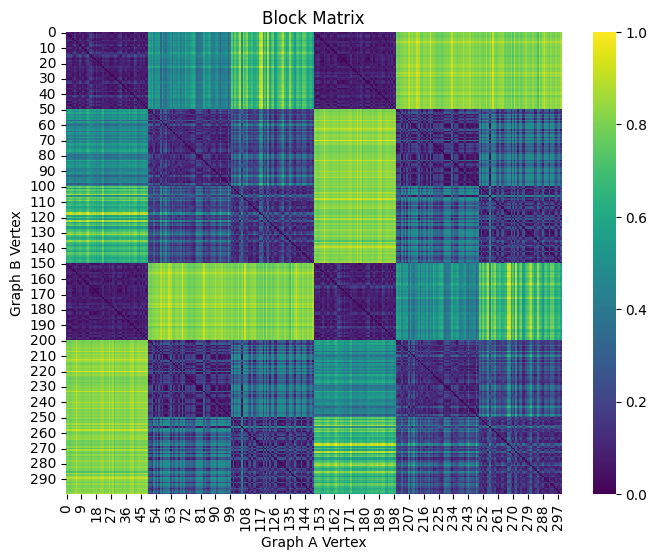

In [4]:
#Plot heat map
iris_spud.plot_heat_map() #The top left block represents domain A, and the bottom right is domain b. The off-diagonals represent interdomain distances.

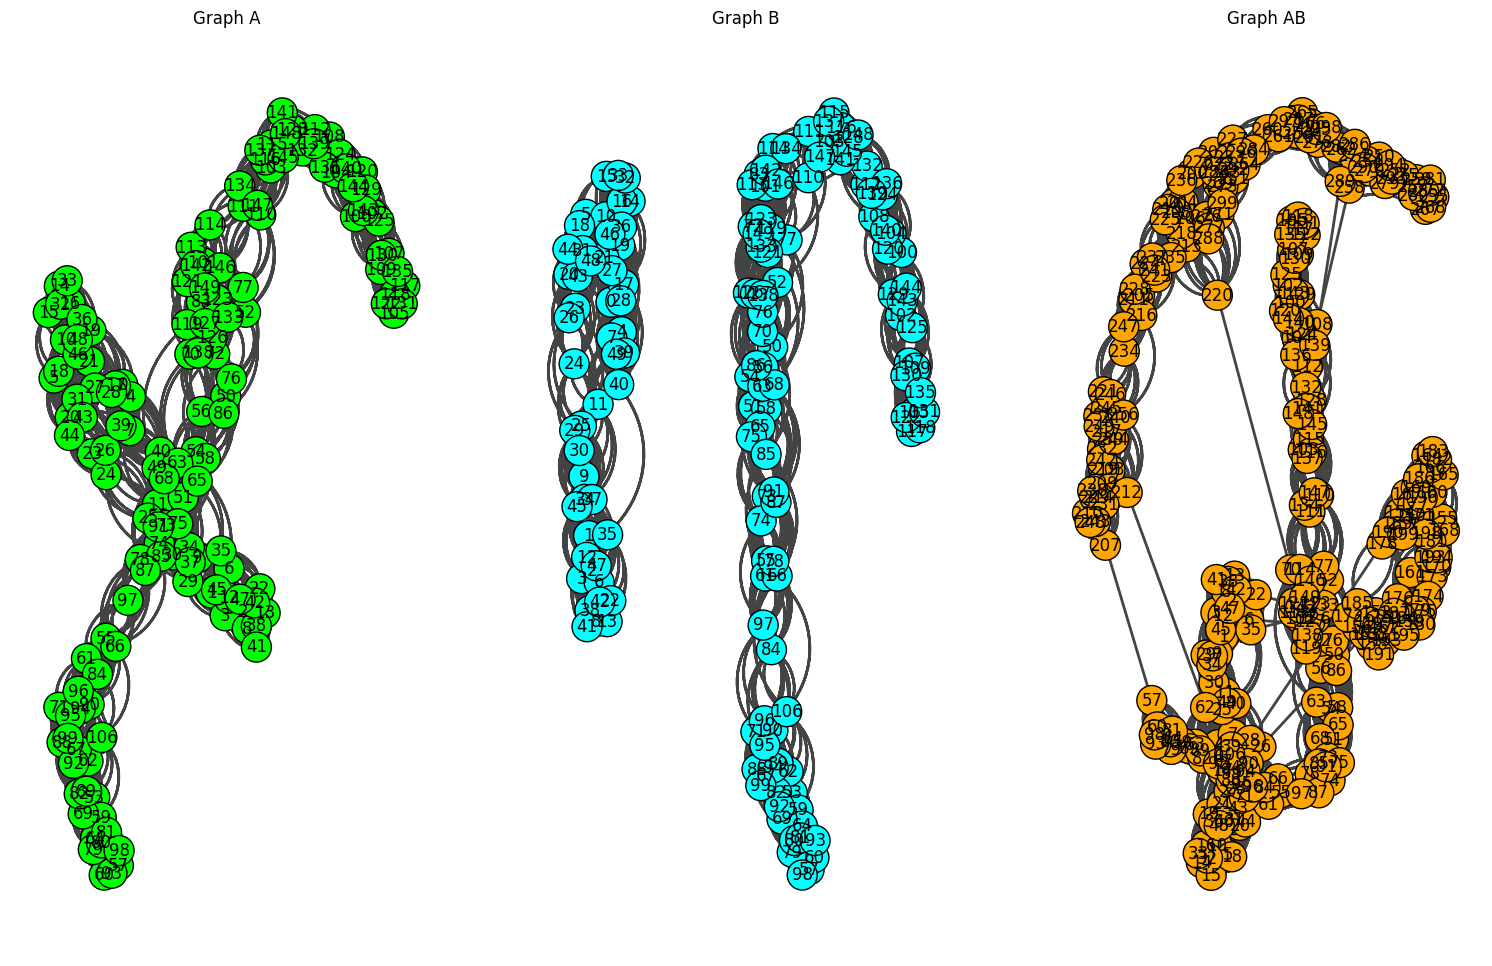

In [5]:
#Plot Graphs
iris_spud.plot_graphs() #This function takes the most time, so in the future, we will not plot it. 

Cross Embedding score: 0.95
Fraction of Samples Closest to thier Match: 0.0006222222222222223


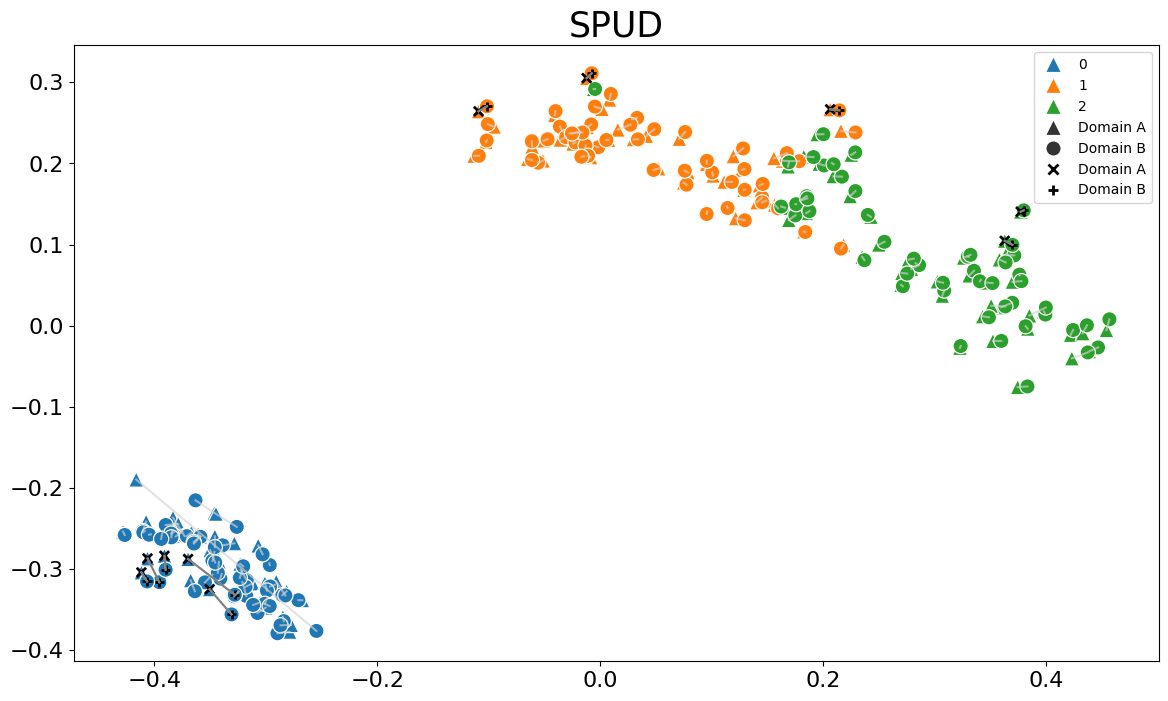

In [6]:
#Plot Embedding
iris_spud.plot_emb(labels = iris_labels) #Try playing with the hyperparameters to change how the plot shows. 

How to interpret the above graph:
- The triangles are instances that come from Domain A, whereas the circles are instances that come from Domain B. 
- The light gray lines connect instances between domains that are the same (though distorted some how). The samller the line, the better i.e. leads to a lower (and better) FOSCTTM score.
- The black x or + means that the instance is an anchor, and thus was known knowledge for the algorithm to use. 
- The colors are different classes. We hope for their to be a natural class split. The better thr split, the higher the CE score. 

## Seeds Dataset

In [7]:
#Prepare the dataset
seeds_features, seeds_labels = prepare_dataset("csv_files/seeds.csv")

#Create domains
seeds_domainA, seeds_domainB = split_features(seeds_features, split = "rotation") #NOTE: Try changing split to "random" or "rotation"

#Create anchors. Use only 10 anchors. 
seeds_anchors = create_anchors(int(len(seeds_features)))[:10] #NOTE: Try changing the 10 to any amount of anchors

# Initialize SPUD
seeds_spud = SPUD(knn = 8, verbose = 3)

#Fit SPUD
seeds_spud.fit(dataA = seeds_domainA, dataB = seeds_domainB, known_anchors=seeds_anchors)

<><><><><><><><><><><><><>  Processed Finished  <><><><><><><><><><><><><>


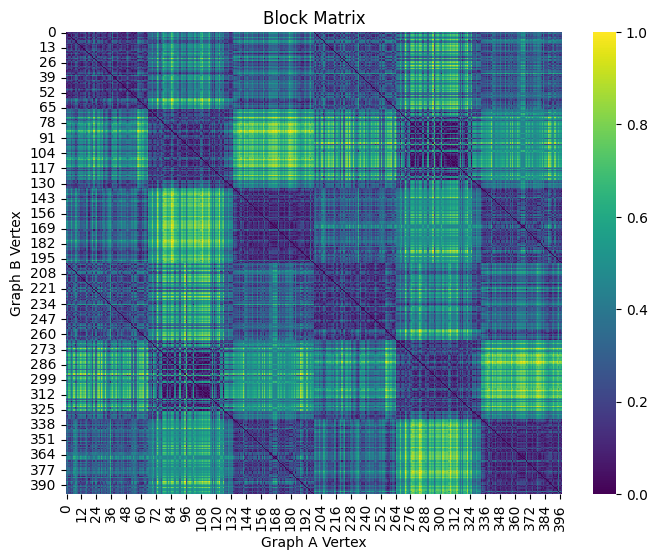

In [8]:
seeds_spud.plot_heat_map()

Cross Embedding score: 0.9120603015075377
Fraction of Samples Closest to thier Match: 0.000151511325471579


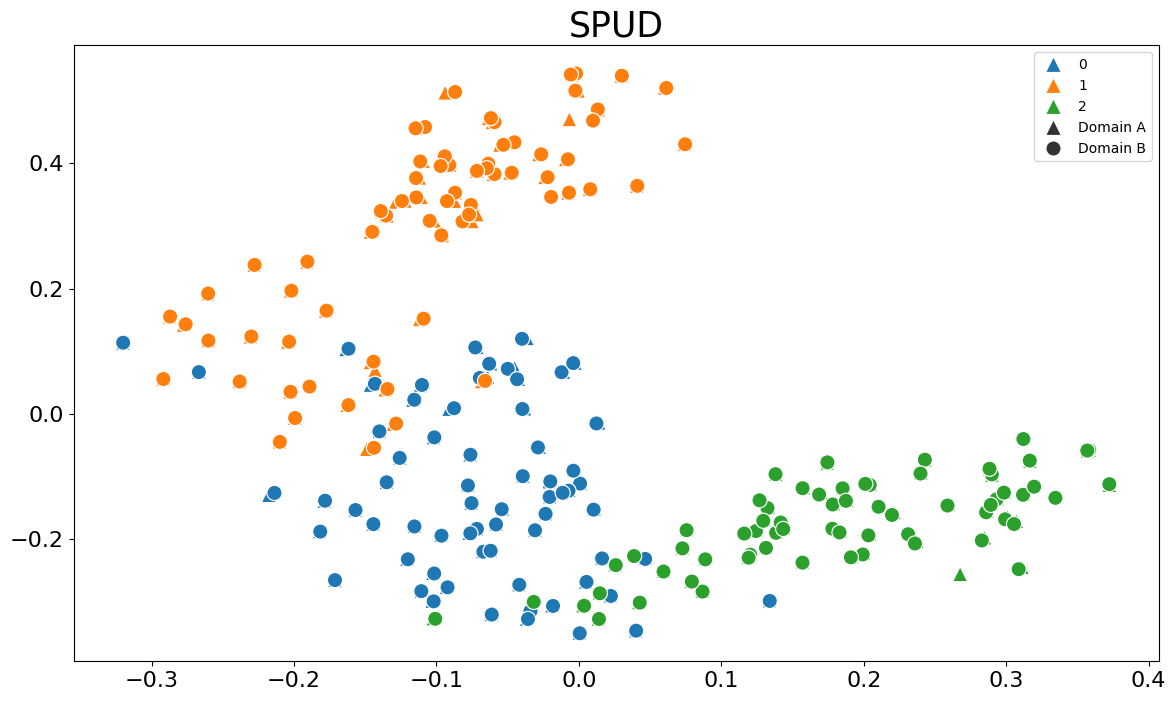

In [9]:
seeds_spud.plot_emb(labels = seeds_labels, show_lines = False, show_anchors = False)

## Breast Cancer Dataset

In [10]:
#Prepare the dataset
cancer_features, cancer_labels = prepare_dataset("csv_files/breast_cancer.csv")

#Create domains
cancer_domainA, cancer_domainB = split_features(cancer_features, split = "random") #NOTE: Try changing split to "random" or "rotation"

#Create anchors. Use only 10 anchors. 
cancer_anchors = create_anchors(int(len(cancer_features)))[:10] #NOTE: Try changing the 10 to any amount of anchors

# Initialize SPUD
cancer_spud = SPUD(knn = 12, agg_method="log", verbose = 4)

#Fit SPUD
cancer_spud.fit(dataA = cancer_domainA, dataB = cancer_domainB, known_anchors=cancer_anchors)

Time it took to compute SGDM:  0.02


/yunity/arusty/Graph-Manifold-Alignment/.venv/lib/python3.10/site-packages/graphtools/graphs.py:122: UserWarning: Building a kNNGraph on data of shape (699, 699) is expensive. Consider setting n_pca.
  warnings.warn(
/yunity/arusty/Graph-Manifold-Alignment/.venv/lib/python3.10/site-packages/graphtools/graphs.py:122: UserWarning: Building a kNNGraph on data of shape (699, 699) is expensive. Consider setting n_pca.
  warnings.warn(


Time it took to execute graphtools.Graph functions:  0.25
Time it took to execute merge_graphs function:  0.0
Time it took to execute get_block function:  0.35
<><><><><><><><><><><><><>  Processed Finished  <><><><><><><><><><><><><>


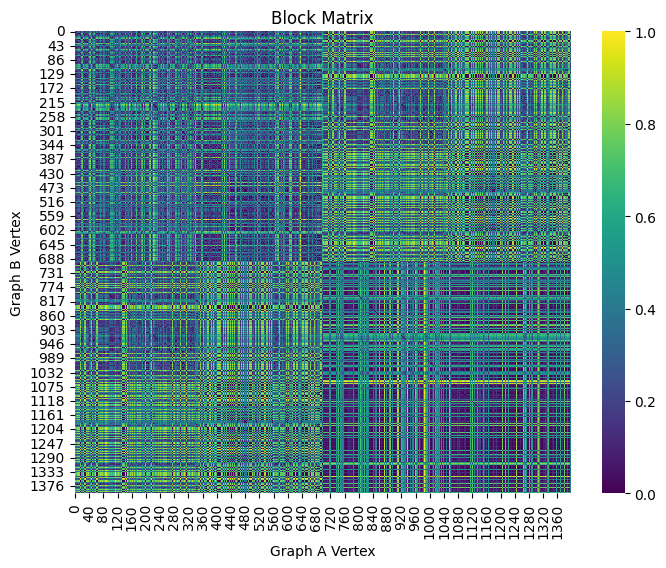

In [11]:
cancer_spud.plot_heat_map()

Time it took to calculate the embedding: 12.56
Cross Embedding score: 0.7489270386266094
Fraction of Samples Closest to thier Match: 0.047529579350021806


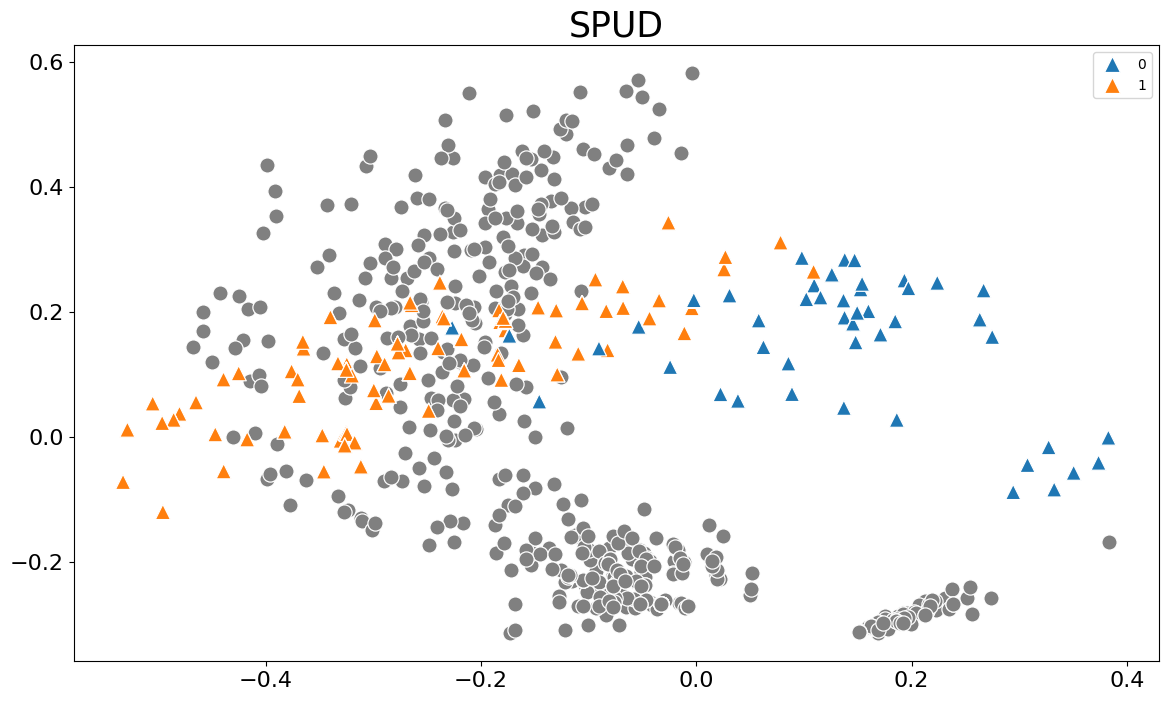

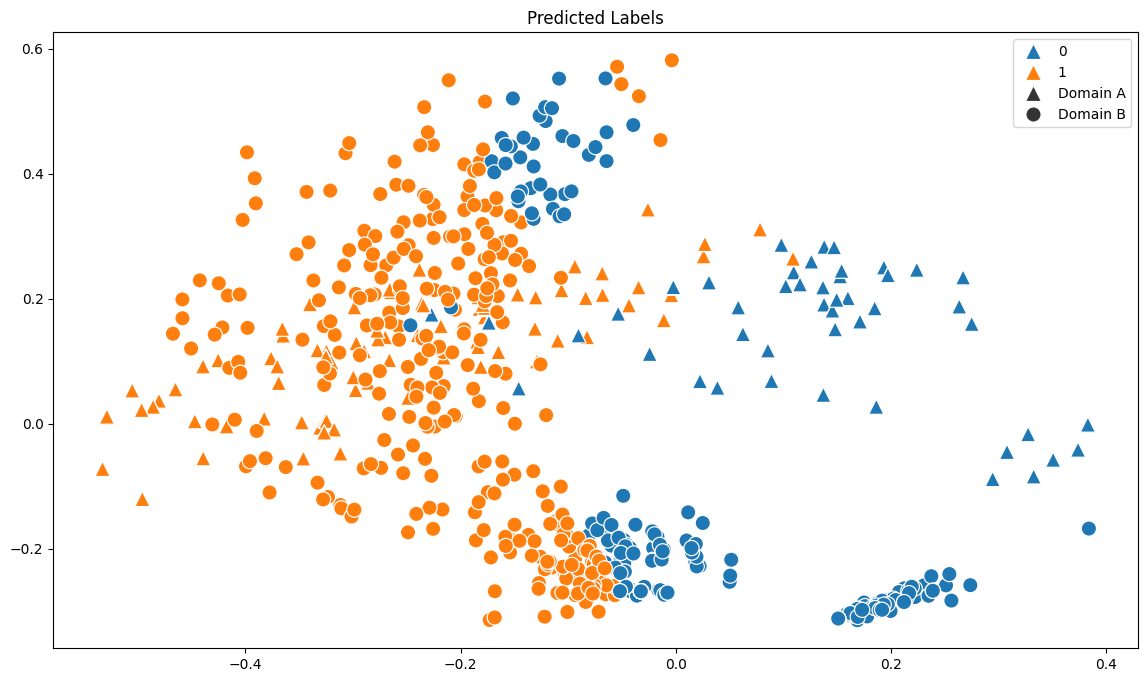

Time it took complete the plots: 0.59


In [12]:
cancer_spud.plot_emb(labels = cancer_labels, show_anchors=False, show_pred=True, show_lines=False) #You can change show_pred to false to see the actual labels the second domain.

## Glass Dataset

In [13]:
#Prepare the dataset
glass_features, glass_labels = prepare_dataset("csv_files/glass.csv")

#Create domains
glass_domainA, glass_domainB = split_features(glass_features, split = "distort") #NOTE: Try changing split to "random" or "rotation"

#Create anchors. Use only 10 anchors. 
glass_anchors = create_anchors(int(len(glass_features)))[:10] #NOTE: Try changing the 10 to any amount of anchors

# Initialize SPUD
glass_spud = SPUD(knn = 35, OD_method = "abs", agg_method="log", overide_method="NAMA", verbose = 4)

#Fit SPUD
glass_spud.fit(dataA = glass_domainA, dataB = glass_domainB, known_anchors=glass_anchors)

Time it took to compute SGDM:  0.0
Skipping graph creating. Performing nearest anchor manifold alignment (NAMA) instead of SPUD.
Preforming abs calculations.

Time it took to execute get_block function:  0.01
<><><><><><><><><><><><><>  Processed Finished  <><><><><><><><><><><><><>


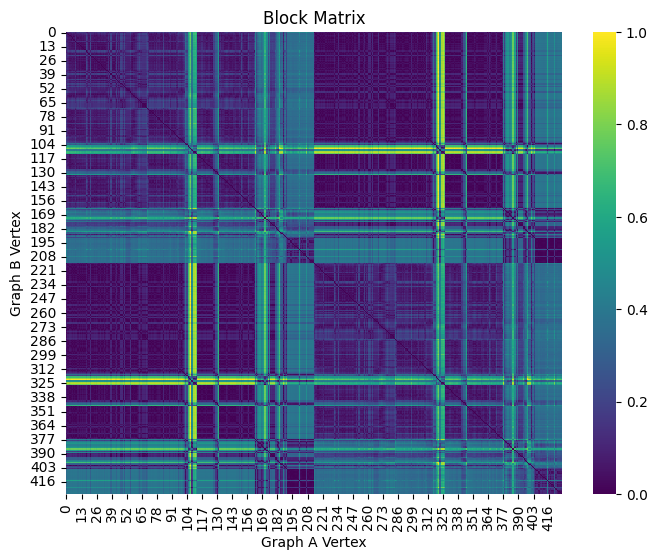

In [14]:
glass_spud.plot_heat_map()

Time it took to calculate the embedding: 1.31
Cross Embedding score: 0.7383177570093458
Fraction of Samples Closest to thier Match: 2.183596820683029e-05


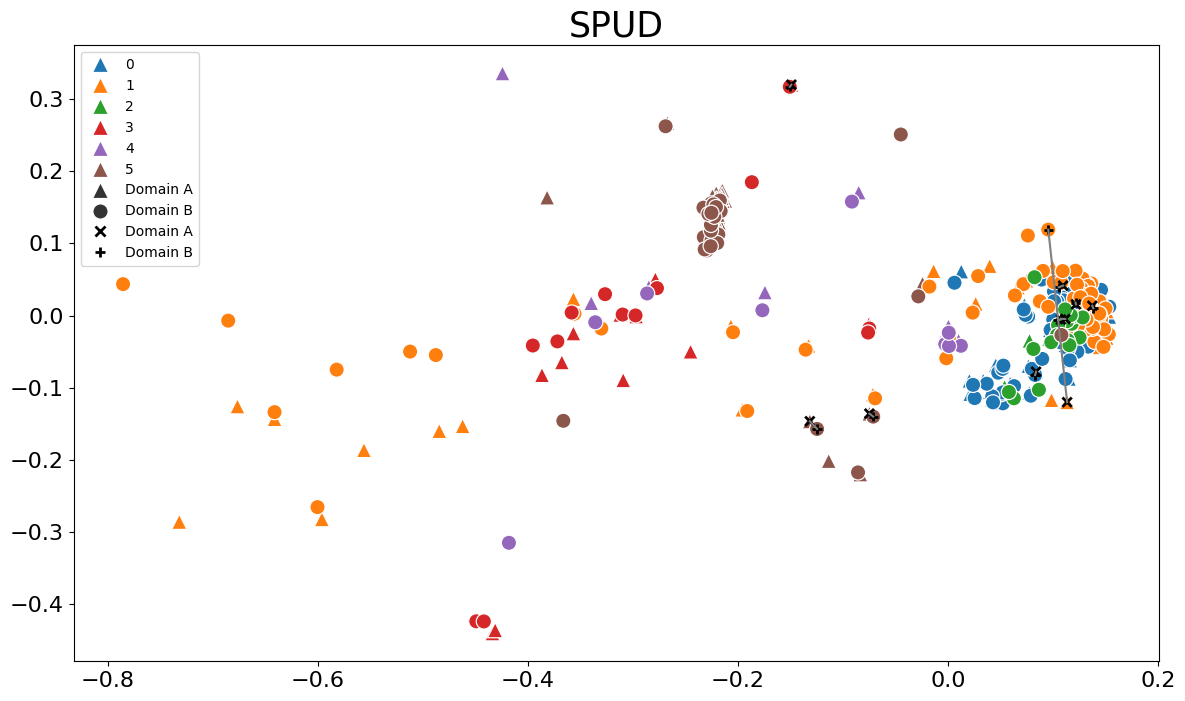

Time it took complete the plots: 0.24


In [15]:
glass_spud.plot_emb(glass_labels, show_lines=False)